<a href="https://colab.research.google.com/github/CathieLC/Wild_notebook_2021-2022/blob/main/CHALLENGE2_Regression_House_sales_Catherine_LE_CALVE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Critères de validation :
-Des régressions linéaires multiples sont effectuées avec Scikit-Learn

-Le score R2 de l'ensemble de test est affiché

-La prédiction pour les 4 dernières lignes est affichée



Dans ce défi, vous devrez faire une prévision des ventes à l'aide de la régression linéaire multiple. 

Vous devrez essayer de trouver des colonnes pertinentes qui justifieront la régression linéaire multiple.

Les 4 dernières rangées n'ont pas de prix.

Vous devrez prédire les prix et imprimer votre prédiction.

Bien sûr, vous devriez faire des graphiques pour l'expliquer : vous êtes Data Analyst !


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/murpi/wilddata/master/quests/kc_house_data.csv', sep = ",")

In [ ]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


#EDA (exploratory Data Analysis)

###Effectuez une première analyse du jeu de données, avec tout ce que vous savez ( describe, info, quantile, etc...)

In [ ]:
df.describe() #uniquement pour les variables numériques


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.160900e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401174e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671546e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.215000e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.describe(include='all') #inclus tout, même les valeurs non numériques

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.160900e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.401174e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671546e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.215000e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [ ]:
#calcul du nombre de valeurs manquantes : on observe dans le résultat qu'il y a 4 valeurs manquantes sur le prix

df.isna().sum()

id               0
date             0
price            4
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
#retirer les 4 lignes de la colonne prix où les valeurs sont manquantes car elles ne nous seront pas utiles ici, nous les reprendront après pour calculer les valeurs manquantes
df_cleaned = df.dropna()

#check
df_cleaned.shape

(21609, 21)

In [ ]:
# reset index
df_cleaned = df_cleaned.reset_index()

#drop ancienne colonne index
df_cleaned.drop(columns=['index'], inplace=True)

In [ ]:
#check
df_cleaned.shape

(21609, 21)

#Effectuez une analyse graphique (notamment avec certains boxplots, pairplots et carte thermique de corrélation)

In [ ]:
df_cleaned.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


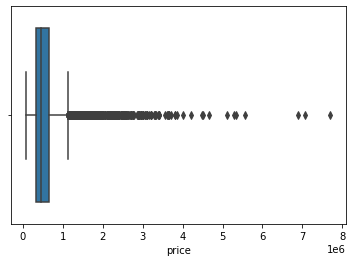

In [ ]:
#distribution des prix

sns.boxplot(data=df_cleaned, x='price')

In [ ]:
# calcul de corrélation entre les colonnes pour faire une heatmap
df_corr = df_cleaned.corr()
df_corr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016826,0.001092,0.005006,-0.012418,-0.132172,0.018655,-0.002733,0.011553,-0.023871,0.008087,-0.010971,-0.005241,0.021541,-0.016937,-0.008212,-0.001868,0.020848,-0.003091,-0.138878
price,-0.016826,1.000000,0.308330,0.525168,0.702040,0.089639,0.256894,0.266367,0.397280,0.036314,0.667444,0.605574,0.323782,0.054123,0.126420,-0.053150,0.307012,0.021601,0.585372,0.082420
bedrooms,0.001092,0.308330,1.000000,0.515776,0.576602,0.031663,0.175579,-0.006594,0.079504,0.028399,0.356934,0.477528,0.303059,0.154369,0.018817,-0.152595,-0.008891,0.129466,0.391525,0.029191
bathrooms,0.005006,0.525168,0.515776,1.000000,0.754653,0.087711,0.500883,0.063743,0.187732,-0.125080,0.664994,0.685323,0.283748,0.506326,0.050722,-0.203729,0.024630,0.222993,0.568579,0.087138
sqft_living,-0.012418,0.702040,0.576602,0.754653,1.000000,0.172798,0.354114,0.103815,0.284597,-0.058834,0.762715,0.876590,0.435012,0.318266,0.055342,-0.199375,0.052559,0.240229,0.756387,0.183249
sqft_lot,-0.132172,0.089639,0.031663,0.087711,0.172798,1.000000,-0.005149,0.021599,0.074694,-0.008994,0.113614,0.183498,0.015250,0.053160,0.007632,-0.129554,-0.085683,0.229523,0.144567,0.718551
floors,0.018655,0.256894,0.175579,0.500883,0.354114,-0.005149,1.000000,0.023715,0.029499,-0.263690,0.458251,0.524017,-0.245620,0.489212,0.006375,-0.059254,0.049621,0.125491,0.280107,-0.011208
waterfront,-0.002733,0.266367,-0.006594,0.063743,0.103815,0.021599,0.023715,1.000000,0.401856,0.016644,0.082774,0.072072,0.080581,-0.026144,0.092882,0.030300,-0.014274,-0.041918,0.086457,0.030698
view,0.011553,0.397280,0.079504,0.187732,0.284597,0.074694,0.029499,0.401856,1.000000,0.045956,0.251320,0.167639,0.276923,-0.053376,0.103907,0.084878,0.006156,-0.078423,0.280417,0.072556
condition,-0.023871,0.036314,0.028399,-0.125080,-0.058834,-0.008994,-0.263690,0.016644,0.045956,1.000000,-0.144697,-0.158270,0.174042,-0.361336,-0.060645,0.003107,-0.014943,-0.106547,-0.092951,-0.003448


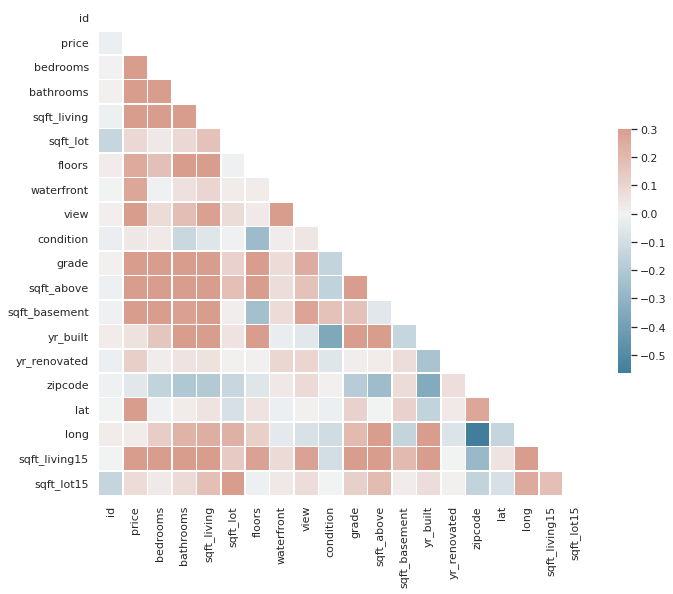

In [ ]:
#heatmap avec df_corr

#taille heatmap
plt.subplots(figsize=(11, 9))

#style
sns.set_theme(style="white")

#quand on a bcp de corrélation, c'est bien de faire une matrice que dans un sens
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_corr, dtype=bool))

# palette de couleur
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# heatmap
sns.heatmap(df_corr,                    # tableau de corrélation ci-dessus
            mask=mask,                  # mask = matrice faite dans un seul sens
            cmap=cmap,                  # palette de couleur
            vmax=.3,                    # Valeurs pour ancrer la palette de couleurs      
            center=0,                   # La valeur à laquelle centrer la palette de couleurs lors du traçage de données divergentes
            square=True,                # Si True, définissez l'aspect des axes sur « equal » afin que chaque cellule soit de forme carrée.
            linewidths=.5,              # Largeur des lignes qui diviseront chaque cellule
            cbar_kws={"shrink": .5})    # Arguments de mot-clé pour matplotlib.figure.Figure.colorbar().


plt.show()

In [ ]:
# Determiner les variables les plus corrélées avec la variable cible: la colonne 'price'

corr_price = df_corr[['price']].sort_values(by='price', ascending=False)
corr_price

,price
price,1.000000
sqft_living,0.702040
grade,0.667444
sqft_above,0.605574
sqft_living15,0.585372
bathrooms,0.525168
view,0.397280
sqft_basement,0.323782
bedrooms,0.308330
lat,0.307012


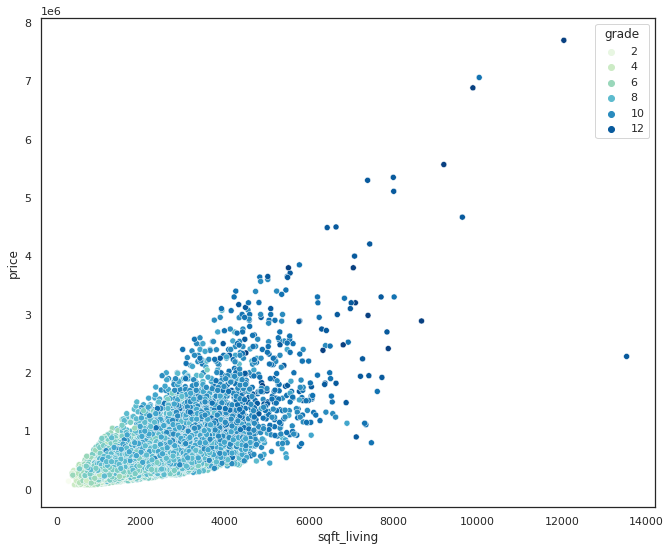

In [ ]:
# Exemple de visualisation de la corrélation des variables explicatives (indépendantes) 'sqft_living' et 'grade' avec la variable cible 'price'

#taille fig
plt.subplots(figsize=(11, 9))

sns.scatterplot(data=df_cleaned, x = 'sqft_living', y = 'price', hue = 'grade', palette='GnBu')

plt.show()

#Modélisation de notre jeu de données - Machine Learning

In [ ]:
# Implémnetation d'un 1er modèle avec les 5 variables explicatives les plus corrélées avec la variable cible('price')
# Score faible

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

var_corr = ['sqft_living','grade','sqft_above', 'sqft_living15', 'bathrooms']

X = df_cleaned[var_corr]
y = df_cleaned['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

lr_model = LinearRegression().fit(X_train, y_train)

print(f"R2 score for training set: {round(lr_model.score(X_train, y_train),2)}")
print(f"R2 score for test set: {round(lr_model.score(X_test, y_test),2)}")

R2 score for training set: 0.55
R2 score for test set: 0.54


In [ ]:
# Implémnetation d'un 2ème modèle avec toutes les variables numériques exploitables
# Score qui s'améliore. Pas de phénomène de surapprentissage


X = df_cleaned.iloc[:, 3:]
y = df_cleaned['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

lr_model = LinearRegression().fit(X_train, y_train)

print(f"R2 score for training set: {round(lr_model.score(X_train, y_train),2)}")
print(f"R2 score for test set: {round(lr_model.score(X_test, y_test),2)}")

R2 score for training set: 0.7
R2 score for test set: 0.69


In [ ]:
# On isole nos observations sur lesquelles nous voumons faire nos prédictions : Ce sont nos 4 lignes du départ que nous avions supprimé pour faire notre 

df_nan = df.loc[pd.isna(df['price'])]
df_nan

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21609,6600060120,20150223T000000,NaN,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,NaN,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,NaN,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,NaN,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
# Prédiction

X_nan = df_nan.iloc[:, 3:]
df_nan['price'] = lr_model.predict(X_nan).round(2)
df_nan

#la colonne price contient déosrmais les valeurs de prédiction de notre modèle lr_model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21609,6600060120,20150223T000000,436408.09,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,150595.10,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,388749.19,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,153266.61,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
# dans chaque df on va rajouter une colonne "flag" et ensuite on va concaténer nos tableaux (df_complete) et on verra dans chaque cellule de 'flag' s'il s'agissait d'une valeur réeelle ou prédite
df_cleaned['flag'] = 'Real values'
df_nan['flag'] = 'Predicted values'

In [ ]:
#concat
df_complete = pd.concat([df_cleaned, df_nan])
df_complete

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,flag
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Real values
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Real values
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Real values
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Real values
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Real values
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.00,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,Real values
21609,6600060120,20150223T000000,436408.09,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,Predicted values
21610,1523300141,20140623T000000,150595.10,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,Predicted values
21611,291310100,20150116T000000,388749.19,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,Predicted values


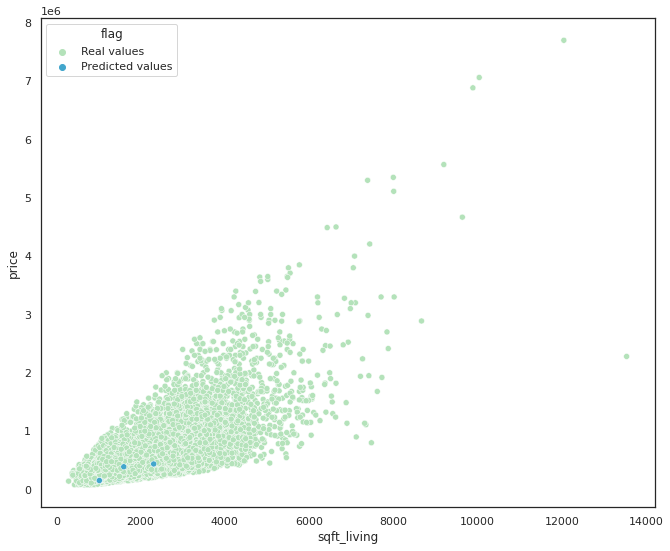

In [ ]:
# On met en perspective nos prédictions avec nos valeurs réels (colonne flag dans hue) et x = sqft_living

#taille fig
plt.subplots(figsize=(11, 9))


sns.scatterplot(data=df_complete, x = 'sqft_living', y = 'price', hue = 'flag', palette='GnBu')
plt.show()

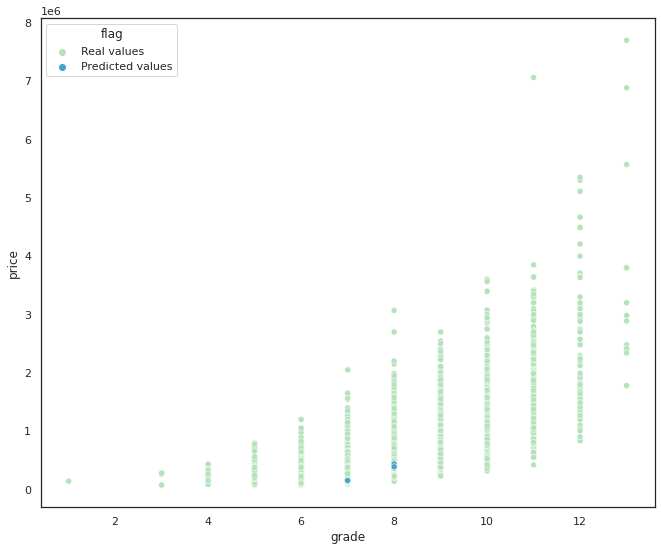

In [ ]:
# On met en perspective nos prédictions avec nos valeurs réels (colonne flag dans hue) et x = grade

#taille fig
plt.subplots(figsize=(11, 9))

sns.scatterplot(data=df_complete, x = 'grade', y = 'price', hue = 'flag', palette='GnBu')
plt.show()
